In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [8]:
df = pd.read_csv('heart_disease_data.csv')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df.shape

(303, 14)

In [12]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

0 - healthy
1 - disease

In [15]:
X = df.drop(columns = 'target', axis = 1)

In [16]:
Y = df['target']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 23)

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
print(x_train.shape, x_test.shape)

(242, 13) (61, 13)


In [36]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators = 200, random_state = 42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder = False, eval_metrics = 'logloss', random_state = 42),
    "SVM": SVC(probability = True, random_state = 42),
    "KNN": KNeighborsClassifier(n_neighbors = 10)
}

In [37]:
results = []
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
        y_proba = model.predict_proba(x_test_scaled)[:,1]
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_proba = model.predict_proba(x_test)[:,1]
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

/home/antek/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:26:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [52]:
knn_results = []
neighbors_range = (1, 50)
for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    y_proba = knn.predict_proba(x_test_scaled)[:, 1]
    knn_results.append({
        "n_neighbors": k,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

knn_df = pd.DataFrame(knn_results)

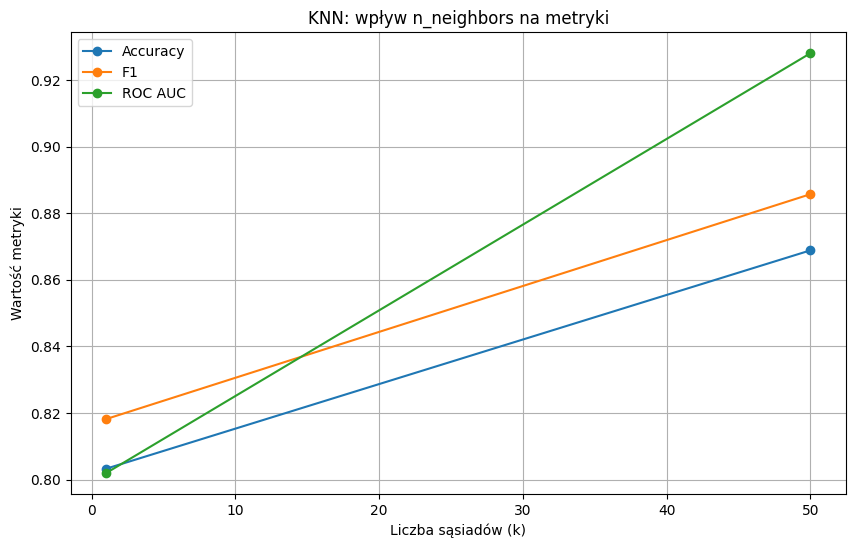

In [53]:
plt.figure(figsize=(10,6))
plt.plot(knn_df["n_neighbors"], knn_df["Accuracy"], label="Accuracy", marker="o")
plt.plot(knn_df["n_neighbors"], knn_df["F1"], label="F1", marker="o")
plt.plot(knn_df["n_neighbors"], knn_df["ROC AUC"], label="ROC AUC", marker="o")
plt.xlabel("Liczba sąsiadów (k)")
plt.ylabel("Wartość metryki")
plt.title("KNN: wpływ n_neighbors na metryki")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
best_k = knn_df.loc[knn_df["ROC AUC"].idxmax(), "n_neighbors"]
print(f"Najlepsze K to: {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train_scaled, y_train)
y_pred = best_knn.predict(x_test_scaled)
y_proba = best_knn.predict_proba(x_test_scaled)[:, 1]

# Dodajemy do tabeli wyników
results.append({
    "Model": f"KNN (k={best_k})",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
})

results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
display(results_df)

Najlepsze K to: 50


,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,0.868852,0.857143,0.909091,0.882353,0.932900
1,Random Forest,0.836066,0.848485,0.848485,0.848485,0.929113
5,KNN (k=50),0.868852,0.837838,0.939394,0.885714,0.928030
3,SVM,0.836066,0.870968,0.818182,0.843750,0.920996
4,KNN,0.852459,0.875000,0.848485,0.861538,0.920996
2,XGBoost,0.803279,0.818182,0.818182,0.818182,0.899351


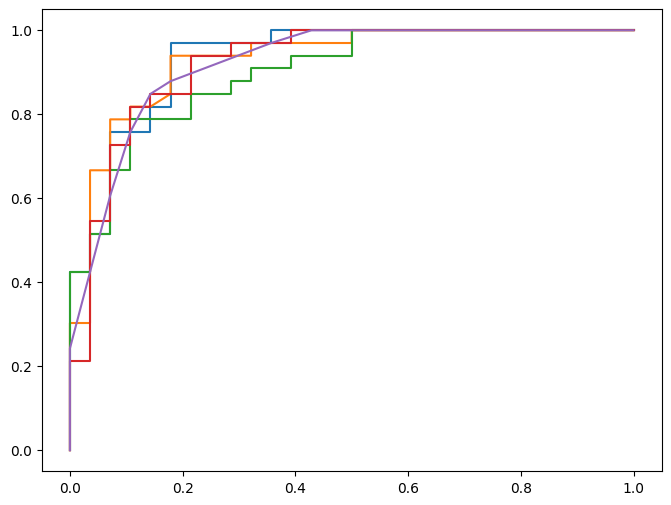

In [60]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        proba = model.predict_proba(x_test_scaled)[:, 1]
    else:
        proba = model.predict_proba(x_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

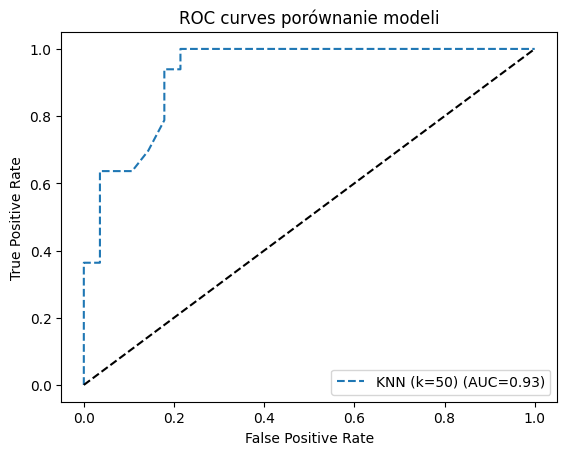

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"KNN (k={best_k}) (AUC={roc_auc:.2f})", linestyle="--")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves porównanie modeli")
plt.legend()
plt.show()

/tmp/ipykernel_51688/2738865580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Blues_d")
/tmp/ipykernel_51688/2738865580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Blues_d")
/tmp/ipykernel_51688/2738865580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Blues_d")


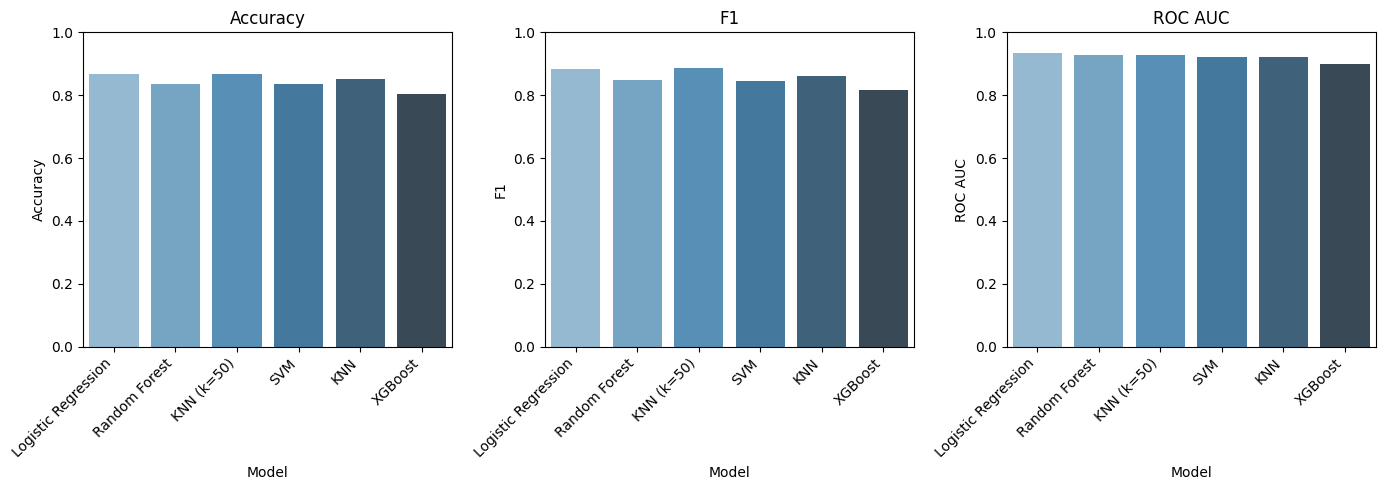

In [64]:
metrics = ["Accuracy", "F1", "ROC AUC"]

plt.figure(figsize=(14,5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x="Model", y=metric, data=results_df, palette="Blues_d")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0,1)
    plt.title(metric)
plt.tight_layout()
plt.show()


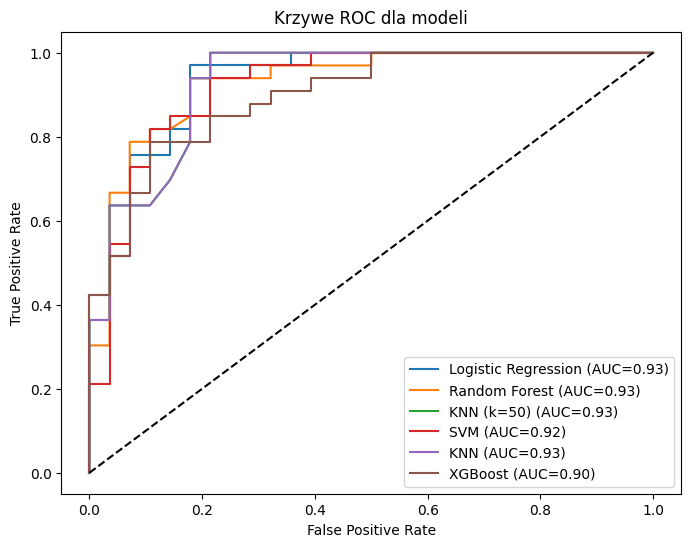

In [66]:
plt.figure(figsize=(8,6))
for idx, row in results_df.iterrows():
    model_name = row["Model"]
    if model_name.startswith("KNN"):
        model = best_knn
        proba = model.predict_proba(x_test_scaled)[:,1]
    elif model_name == "SVM":
        model = models["SVM"]
        proba = model.predict_proba(x_test_scaled)[:,1]
    else:
        model = models.get(model_name.split(" (")[0], None)  # obsługa np. "KNN (k=17)"
        if model is not None:
            proba = model.predict_proba(x_test)[:,1]
        else:
            continue

    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Krzywe ROC dla modeli")
plt.legend()
plt.show()

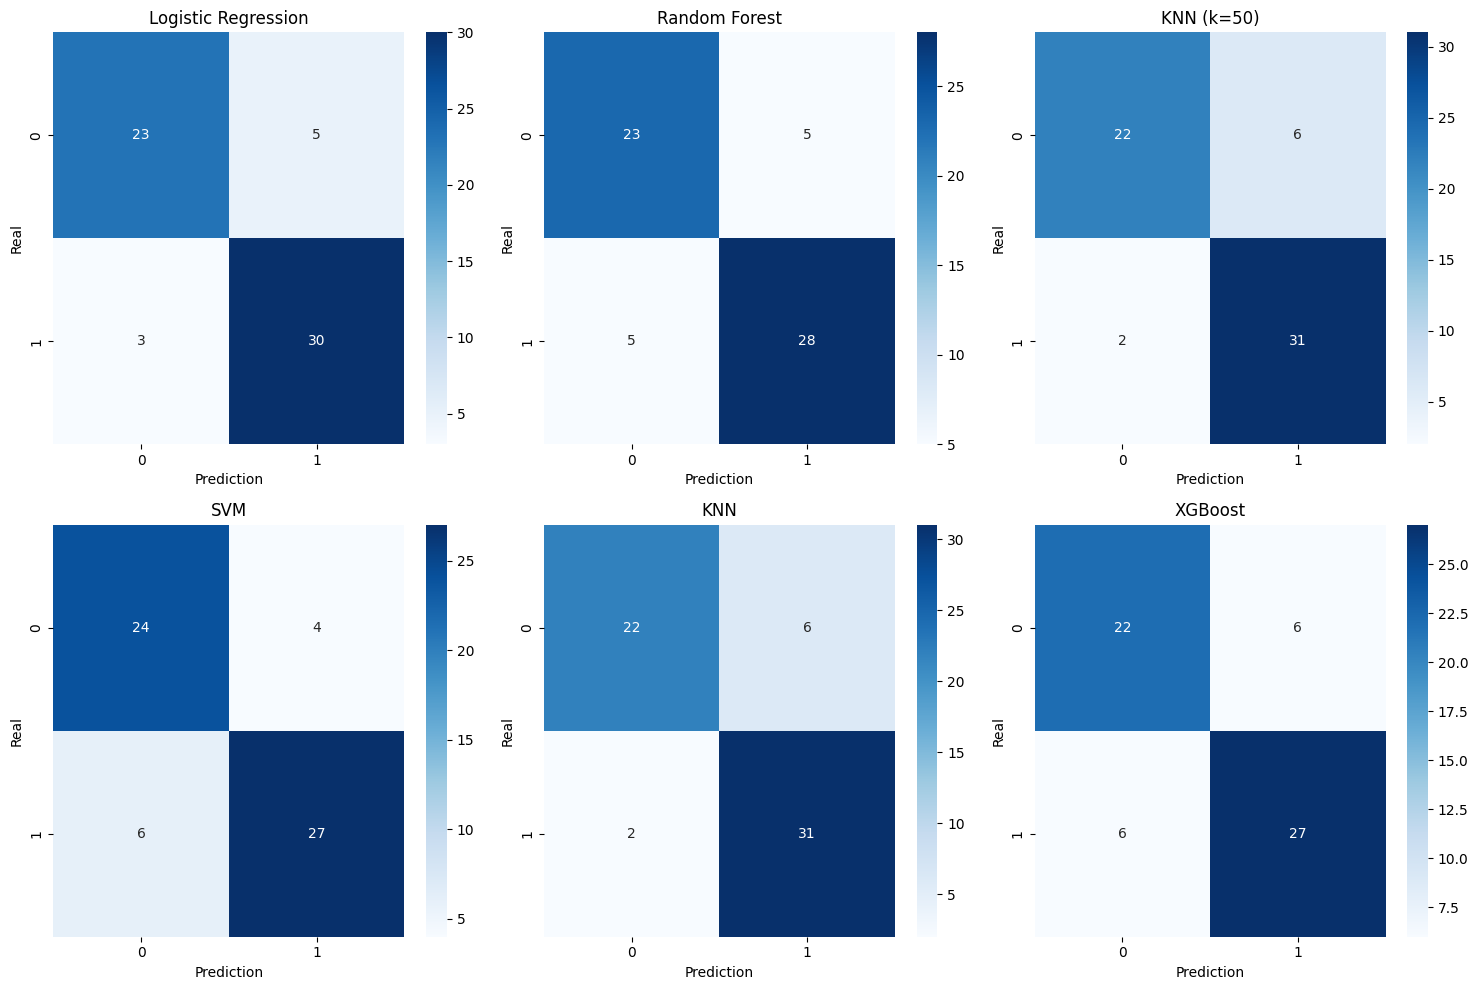

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.ravel()

for i, row in enumerate(results_df.iterrows()):
    model_name = row[1]["Model"]

    if model_name.startswith("KNN"):
        y_pred = best_knn.predict(x_test_scaled)
    elif model_name == "SVM":
        y_pred = models["SVM"].predict(x_test_scaled)
    else:
        model = models.get(model_name.split(" (")[0], None)
        if model is not None:
            y_pred = model.predict(x_test)
        else:
            continue
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Prediction")
    axes[i].set_ylabel("Real")

plt.tight_layout()
plt.show()

# Comparison of Classifiers for Heart Disease Prediction

In the conducted experiment, we compared several classifiers (Logistic Regression, Random Forest, XGBoost, SVM, KNN). The results showed that all models achieved good performance, but their effectiveness varied depending on the metric. KNN with a larger number of neighbors proved to be particularly stable and yielded high ROC AUC values, suggesting a strong ability to distinguish between healthy and sick patients. XGBoost and Random Forest performed very well in terms of overall accuracy and F1-score, confirming the strength of ensemble methods for this type of task.  

Analysis of the confusion matrices indicated that some models tended to misclassify sick patients as healthy (which is particularly dangerous in medical practice), highlighting the importance of paying attention not only to accuracy but especially to Recall and ROC AUC. In this context, ensemble models (XGBoost, Random Forest) and KNN with a larger k performed best.  

In summary, it can be concluded that for the problem of heart disease prediction, ensemble-based models (XGBoost, Random Forest) and a well-tuned KNN provide the best balance between overall accuracy and the ability to detect sick patients.
